You are given the following data:
sp500_prices.csv
The above text file consists of daily end-of-day prices for all stocks that were ever in the S&P 500 over the last 10 (roughly) years.

1.    Convert the daily prices into daily returns, for each of the stocks.

In [2]:
# Read Data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import cufflinks as cf
%matplotlib inline

df=pd.read_csv('sp500_prices.csv',index_col='Date')
df.index=pd.to_datetime(df.index)
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,27.36,NaN,NaN,2.77,NaN,2.76,14.00,10.46,NaN,18.89,...,23.75,19.89,14.89,19.50,11.03,19.89,10.30,18.11,32.88,5.59
1999-11-19,25.11,NaN,NaN,2.86,NaN,2.73,14.50,10.32,NaN,18.77,...,23.52,19.75,15.25,19.19,11.03,19.68,10.26,17.73,32.75,5.59
1999-11-22,27.36,NaN,NaN,2.80,NaN,2.65,14.12,10.70,NaN,18.87,...,22.75,19.61,15.29,19.06,11.09,19.46,10.23,18.03,32.75,5.49
1999-11-23,24.88,NaN,NaN,2.87,NaN,2.46,14.69,10.44,NaN,18.55,...,21.71,19.06,15.56,18.47,11.03,19.20,10.08,18.07,33.00,5.38
1999-11-24,25.54,NaN,NaN,2.93,NaN,2.46,14.31,10.60,NaN,18.63,...,20.68,18.37,15.16,17.62,11.09,18.95,10.20,17.92,33.38,5.39


In [3]:
daily_returns=df.pct_change()
daily_returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-19,-0.082237,NaN,NaN,0.032491,NaN,-0.010870,0.035714,-0.013384,NaN,-0.006353,...,-0.009684,-0.007039,0.024177,-0.015897,0.00000,-0.010558,-0.003883,-0.020983,-0.003954,0.000000
1999-11-22,0.089606,NaN,NaN,-0.020979,NaN,-0.029304,-0.026207,0.036822,NaN,0.005328,...,-0.032738,-0.007089,0.002623,-0.006774,0.00544,-0.011179,-0.002924,0.016920,0.000000,-0.017889
1999-11-23,-0.090643,NaN,NaN,0.025000,NaN,-0.071698,0.040368,-0.024299,NaN,-0.016958,...,-0.045714,-0.028047,0.017659,-0.030955,-0.00541,-0.013361,-0.014663,0.002219,0.007634,-0.020036
1999-11-24,0.026527,NaN,NaN,0.020906,NaN,0.000000,-0.025868,0.015326,NaN,0.004313,...,-0.047444,-0.036201,-0.025707,-0.046021,0.00544,-0.013021,0.011905,-0.008301,0.011515,0.001859


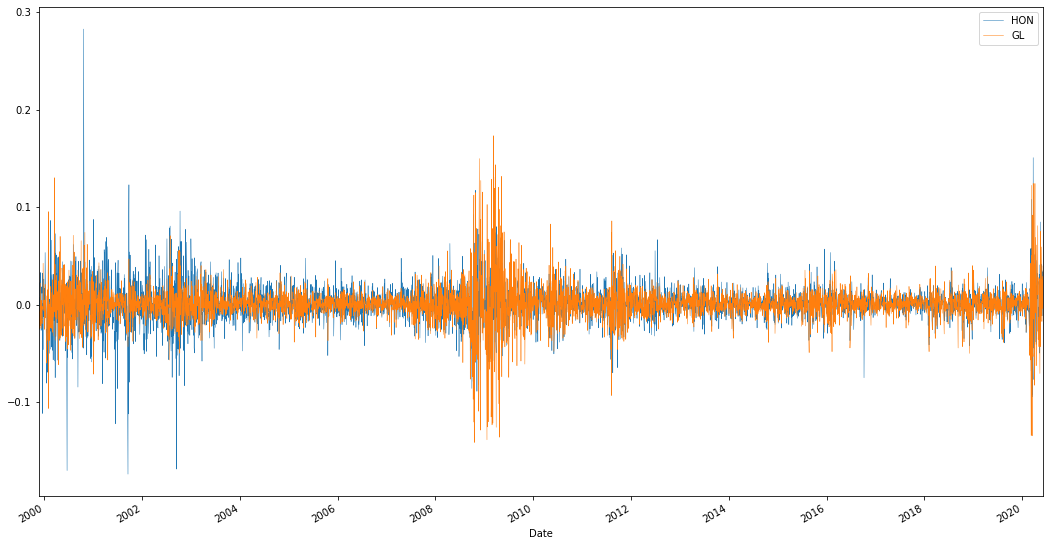

In [4]:
daily_returns.sample(n=2,axis='columns').plot(figsize=(18,10),lw='0.5')
plt.autoscale(enable=True, axis='x', tight=True)

2.    Calculate the following summary statistics for the stock returns:
            a.    Annualized return and volatility
            b.    Calculate the maximum drawdown (MDD)* as well as the starting and ending dates of said drawdown
*Note: The maximum drawdown (MDD) is defined as the maximum loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.

In [5]:
yearly_returns=df.resample('Y').ffill().pct_change()
yearly_returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,-0.291805,NaN,NaN,-0.710692,NaN,2.326733,0.319369,0.359359,NaN,0.732175,...,0.114315,-0.411556,0.284083,0.396364,0.482109,0.438986,0.361360,0.087508,-0.289395,0.486989
2001-12-31,-0.479295,NaN,NaN,0.467391,NaN,0.259921,-0.347629,0.170103,NaN,-0.465583,...,-0.453473,0.338501,0.071130,-0.226562,0.294790,-0.303231,0.158344,0.248397,0.244941,0.317500
2002-12-31,-0.369994,NaN,-0.017165,-0.340741,NaN,-0.144094,-0.769912,-0.266834,-0.332010,-0.200000,...,-0.295681,-0.086229,0.048828,-0.317247,0.149657,-0.221812,0.086784,-0.136852,-0.218422,0.176471
2003-12-31,0.627574,NaN,0.664942,0.483146,NaN,0.057038,0.920330,0.192275,0.463596,0.578479,...,0.096698,0.451408,0.256052,0.976438,0.163466,0.320921,0.370042,0.188312,0.467071,0.117742


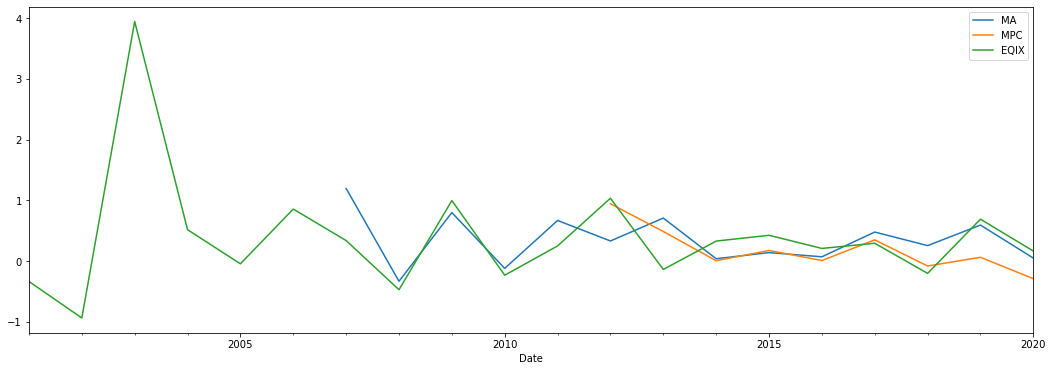

In [6]:
yearly_returns.sample(n=3,axis='columns').plot(figsize=(18,6))
plt.autoscale(enable=True, axis='x', tight=True)

In [7]:
monthly_returns=df.resample('M').ffill().pct_change()
monthly_returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,0.832317,NaN,NaN,0.049505,NaN,0.226721,0.190415,-0.044933,NaN,-0.020540,...,-0.004030,0.102851,-0.011944,0.344378,-0.031022,0.045856,0.096078,-0.121938,-0.077646,0.005607
2000-01-31,-0.143927,NaN,NaN,0.009434,NaN,0.194719,0.591404,-0.098098,NaN,-0.180947,...,-0.079919,0.083122,-0.160510,0.126465,-0.102637,0.088220,0.000000,0.011414,-0.308268,0.092937
2000-02-29,0.569485,NaN,NaN,0.102804,NaN,-0.196133,0.263932,0.013319,NaN,0.852231,...,0.194063,-0.114647,0.092000,0.421090,-0.012592,0.213107,0.066190,-0.180564,-0.135123,-0.124150
2000-03-31,0.001238,NaN,NaN,0.186441,NaN,0.030928,-0.452259,0.065717,NaN,0.091627,...,0.357274,0.093023,0.156777,-0.092882,0.051010,0.035614,0.040268,0.200459,0.220831,-0.019417


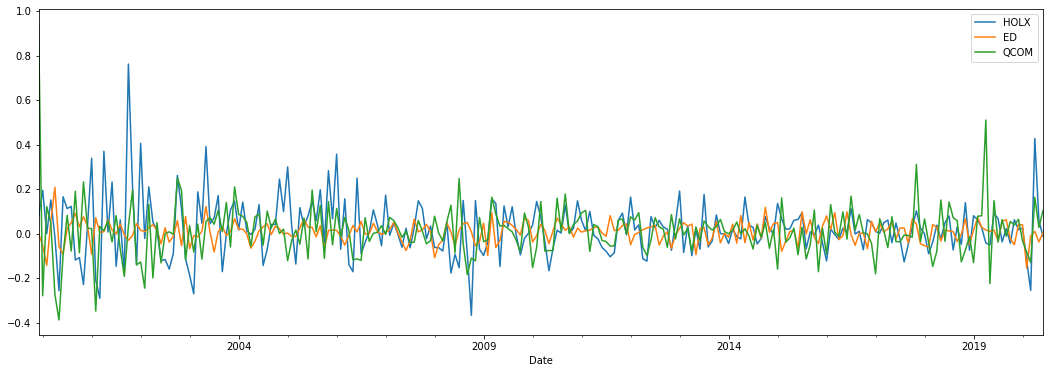

In [8]:
monthly_returns.sample(n=3,axis='columns').plot(figsize=(18,6))
plt.autoscale(enable=True, axis='x', tight=True)

In [9]:
# np.log1p calculates log(1 + x)
daily_log_returns= np.log1p(df.pct_change())

In [10]:
daily_log_returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-19,-0.085816,NaN,NaN,0.031974,NaN,-0.010929,0.035091,-0.013475,NaN,-0.006373,...,-0.009731,-0.007064,0.023890,-0.016025,0.000000,-0.010614,-0.003891,-0.021206,-0.003962,0.000000
1999-11-22,0.085816,NaN,NaN,-0.021202,NaN,-0.029742,-0.026556,0.036160,NaN,0.005314,...,-0.033286,-0.007114,0.002620,-0.006797,0.005425,-0.011242,-0.002928,0.016779,0.000000,-0.018051
1999-11-23,-0.095018,NaN,NaN,0.024693,NaN,-0.074398,0.039575,-0.024599,NaN,-0.017104,...,-0.046792,-0.028448,0.017504,-0.031444,-0.005425,-0.013451,-0.014771,0.002216,0.007605,-0.020240
1999-11-24,0.026182,NaN,NaN,0.020690,NaN,0.000000,-0.026208,0.015209,NaN,0.004303,...,-0.048606,-0.036873,-0.026043,-0.047113,0.005425,-0.013106,0.011834,-0.008336,0.011449,0.001857


In [11]:
annualized_volatility=daily_log_returns.rolling(window=252).std() * np.sqrt(252)

[10914.0, 18418.0, 10914.0, 18418.0]

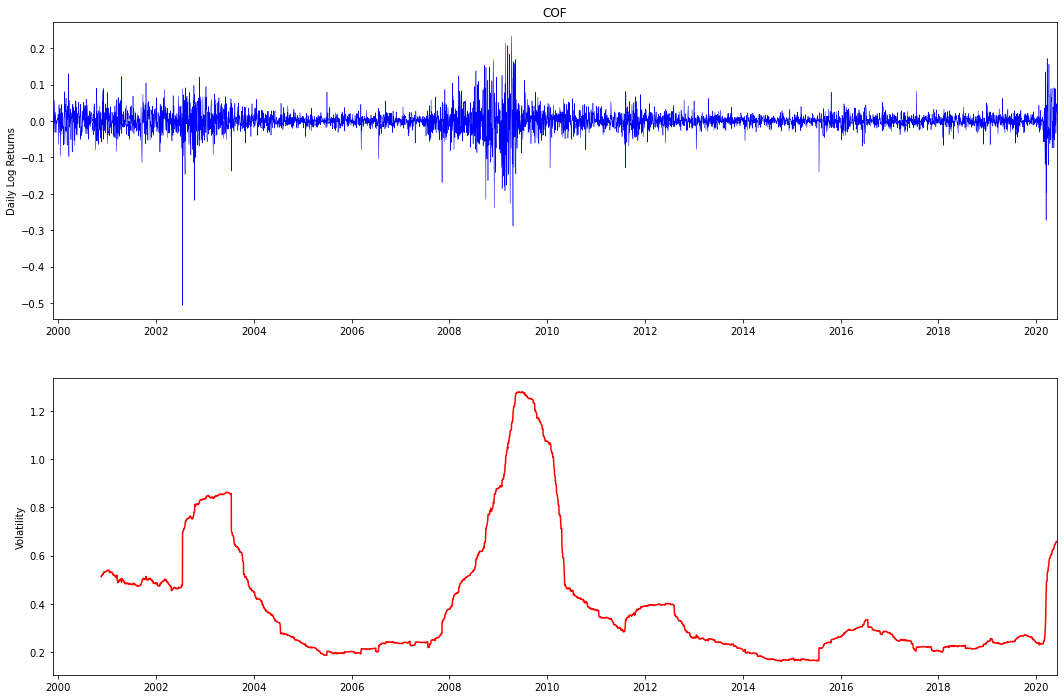

In [51]:
stock=np.random.choice(daily_log_returns.columns)

fig,axes = plt.subplots(nrows=2,ncols=1, figsize=(18,12))
axes[0].plot(daily_log_returns[stock].dropna(),ls='-',color='blue',lw='0.5')
axes[0].autoscale(enable=True, axis='x', tight=True)
axes[0].set_ylabel('Daily Log Returns')
axes[0].set_title(stock)

axes[1].plot(annualized_volatility[stock],ls='-',color='red',lw='1.5')
axes[1].set_ylabel('Volatility')
plt.setp(axes, xlim=axes[0].get_xlim())

2 b.    Calculate the maximum drawdown (MDD)* as well as the starting and ending dates of said drawdown
*Note: The maximum drawdown (MDD) is defined as the maximum loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.

https://en.wikipedia.org/wiki/Drawdown_(economics)

In [52]:
drawdown= np.maximum.accumulate(df.fillna(-999))-df.fillna(-999)
MDD=np.maximum.accumulate(drawdown)

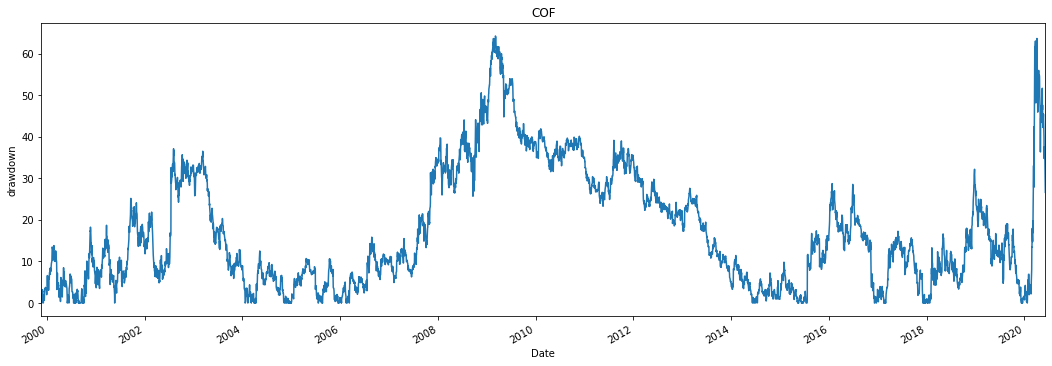

In [53]:
drawdown[stock].plot(figsize=(18,6))
plt.title(stock)
plt.ylabel('drawdown')
plt.autoscale(enable=True, axis='x', tight=True)

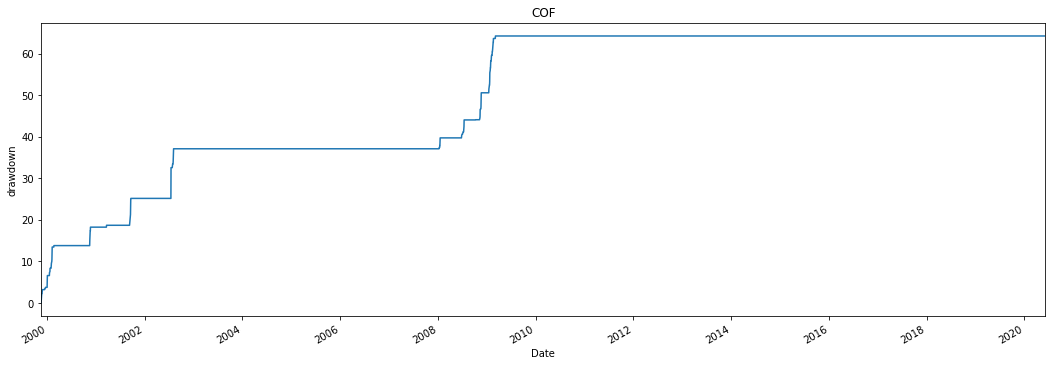

In [54]:
MDD[stock].plot(figsize=(18,6))
plt.title(stock)
plt.ylabel('drawdown')
plt.autoscale(enable=True, axis='x', tight=True)

In [55]:
MDD_dates=pd.DataFrame(columns=df.columns,index=[['Start Date', 'End Date']])
for s in df.columns:
    xs=df[s].fillna(-999)
    i = (np.maximum.accumulate(xs) - xs).idxmax() # end of the period
    j = xs[:i].idxmax() # start of period
    MDD_dates[s]['Start Date']=j
    MDD_dates[s]['End Date']=i
MDD_dates

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Start Date,2000-03-06 00:00:00,2006-11-22 00:00:00,2015-11-02 00:00:00,2020-02-12 00:00:00,2018-01-26 00:00:00,2015-04-24 00:00:00,2018-09-28 00:00:00,2020-01-22 00:00:00,2020-02-19 00:00:00,2020-02-19 00:00:00,...,2018-05-22 00:00:00,2015-08-05 00:00:00,2020-01-23 00:00:00,2018-08-27 00:00:00,2016-08-22 00:00:00,2014-06-30 00:00:00,2007-02-07 00:00:00,2018-09-21 00:00:00,2020-02-19 00:00:00,2020-01-30 00:00:00
End Date,2002-10-10 00:00:00,2008-07-15 00:00:00,2020-03-20 00:00:00,2020-03-23 00:00:00,2019-08-15 00:00:00,2016-11-08 00:00:00,2020-03-20 00:00:00,2020-03-23 00:00:00,2020-03-23 00:00:00,2020-03-12 00:00:00,...,2020-03-12 00:00:00,2020-03-18 00:00:00,2020-03-23 00:00:00,2020-03-16 00:00:00,2018-12-24 00:00:00,2020-03-18 00:00:00,2009-03-06 00:00:00,2020-04-03 00:00:00,2020-03-23 00:00:00,2020-03-23 00:00:00


(Timestamp('2009-03-06 00:00:00'), Timestamp('2006-03-10 00:00:00'))

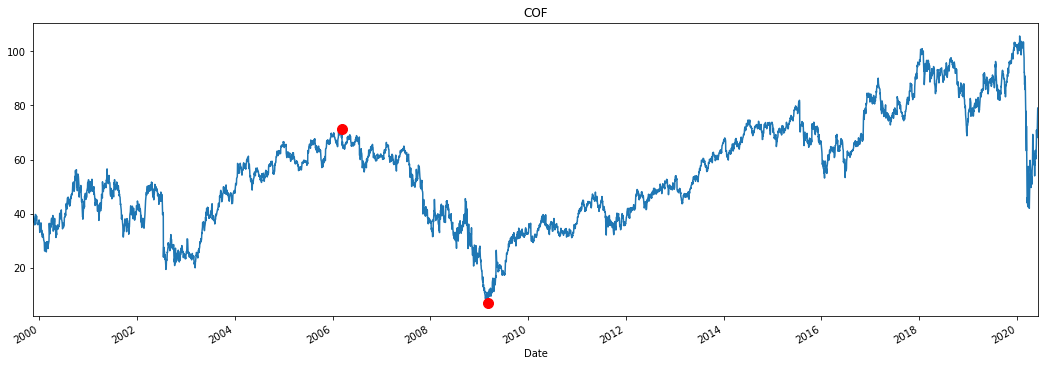

In [92]:
xs = df[stock].fillna(-999)
i = drawdown[stock].idxmax() # end of the period
j = xs[:i].idxmax() # start of period

df[stock].plot(figsize=(18,6))
plt.title(stock)
plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)
plt.autoscale(enable=True, axis='x', tight=True)
i,j

3.    Use the daily returns to calculate a daily 12-1 price momentum* signal for each stock. 
*Note: 12-1 (12 months minus 1 month) price momentum is defined as the percent change in price from one year ago to one month ago (e.g. If today is January 1, 2020, it is the change in price from January 1, 2019 to December 1, 2019). The number shows you the return of a share price over the past year but excluding the last month. It is useful to screen out companies with a large jump in share price over the past month which studies have shown usually reverses shortly after.

In [271]:
momentum_12_1=df.resample('MS').ffill().shift(1).pct_change(11).dropna(how='all')
# MS      month start frequency

In [278]:
df.loc['1999-11-30']

A       26.24
AAL       NaN
AAP       NaN
AAPL     3.03
ABBV      NaN
        ...  
SLB     18.10
SLG     10.20
SNA     17.96
SNPS    36.19
SO       5.35
Name: 1999-11-30 00:00:00, Length: 418, dtype: float64

In [280]:
df.resample('M').ffill()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-30,26.24,NaN,NaN,3.03,NaN,2.47,15.44,10.46,NaN,17.04,...,19.85,17.89,15.07,18.41,10.96,18.10,10.20,17.96,36.19,5.35
1999-12-31,48.08,NaN,NaN,3.18,NaN,3.03,18.38,9.99,NaN,16.69,...,19.77,19.73,14.89,24.75,10.62,18.93,11.18,15.77,33.38,5.38
2000-01-31,41.16,NaN,NaN,3.21,NaN,3.62,29.25,9.01,NaN,13.67,...,18.19,21.37,12.50,27.88,9.53,20.60,11.18,15.95,23.09,5.88
2000-02-29,64.60,NaN,NaN,3.54,NaN,2.91,36.97,9.13,NaN,25.32,...,21.72,18.92,13.65,39.62,9.41,24.99,11.92,13.07,19.97,5.15
2000-03-31,64.68,NaN,NaN,4.20,NaN,3.00,20.25,9.73,NaN,27.64,...,29.48,20.68,15.79,35.94,9.89,25.88,12.40,15.69,24.38,5.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,76.87,19.05,132.61,272.62,84.45,83.90,150.26,76.71,179.78,345.12,...,40.54,30.01,515.52,208.16,102.22,26.91,76.98,143.57,137.93,59.65
2020-03-31,71.62,12.19,93.32,253.60,75.07,88.06,145.16,78.58,162.53,318.24,...,33.44,24.59,458.43,151.08,110.17,13.40,42.56,107.94,128.79,53.51
2020-04-30,76.66,12.01,120.91,293.01,82.20,89.21,191.25,92.09,185.19,353.64,...,37.52,28.45,535.10,193.17,114.05,16.71,52.69,129.23,157.12,56.07


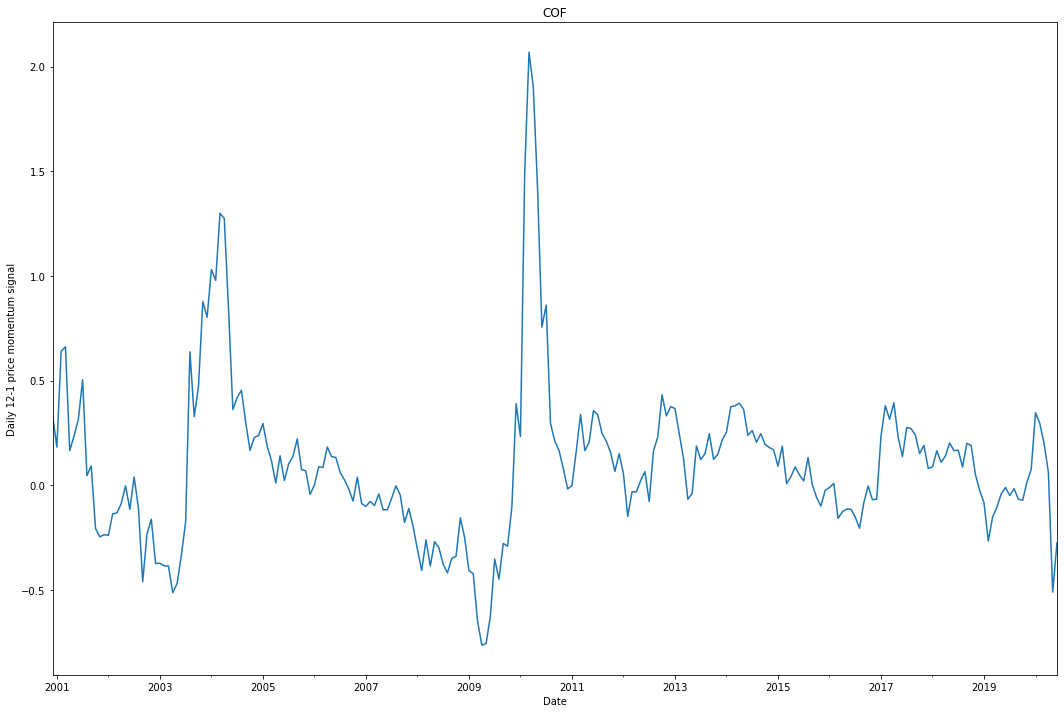

In [272]:
momentum_12_1[stock].dropna().plot(figsize=(18,12))
plt.title(stock)
plt.ylabel('Daily 12-1 price momentum signal')
plt.autoscale(enable=True, axis='x', tight=True)

4. Use the momentum signal to construct a momentum portfolio that rebalances on the first business day of each month. The portfolio should be an equal-weighted long-short* portfolio based on the signal calculated from step 3.
            a.    Return both the daily weights and daily returns for the above portfolio.
            b.    Calcuate the information Ratio (= annualized active return / annualized volatility)
            c.    Calculate the maximum drawdown* as well as the starting and ending dates of said drawdown
 *Note: Long/short equity is an investment strategy that seeks to take a long position in underpriced stocks while selling short overpriced shares

In [268]:
monthly_log_returns= np.log1p(df.resample('MS').ffill().pct_change())

lookahead_returns=monthly_log_returns.shift(-1)

In [270]:
lookahead_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-01,0.588203,NaN,NaN,-0.003140,NaN,0.200304,0.178195,-0.030559,NaN,0.010238,...,0.019408,0.108576,0.033462,0.301378,-0.025106,0.039326,0.094684,-0.133928,-0.071108,0.003724
2000-01-01,-0.085047,NaN,NaN,-0.025479,NaN,0.207846,0.447375,-0.094410,NaN,-0.185082,...,-0.070729,0.061906,-0.130370,0.175565,-0.108294,0.130555,0.002680,-0.005086,-0.360362,0.076892
2000-02-01,0.429775,NaN,NaN,0.262364,NaN,-0.227846,0.156483,0.028201,NaN,0.585942,...,0.266698,-0.069537,0.056521,0.305239,-0.020138,0.189482,0.072258,-0.160010,-0.150363,-0.132303
2000-03-01,-0.048142,NaN,NaN,0.041318,NaN,0.010050,-0.506966,0.039838,NaN,0.103593,...,0.203577,0.054658,0.132537,-0.107778,0.057218,-0.007315,0.028632,0.160010,0.196532,-0.007890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,-0.068863,-0.339093,0.009319,-0.121826,0.056260,-0.010198,-0.214937,-0.123229,-0.127807,-0.017293,...,-0.107480,-0.158094,-0.072440,-0.143706,0.002057,-0.197931,-0.159813,-0.091078,-0.067150,-0.145032
2020-03-01,-0.109169,-0.577758,-0.396868,-0.126357,-0.154782,0.022393,-0.039226,-0.006015,-0.154846,-0.136084,...,-0.212166,-0.206948,-0.195513,-0.396593,0.062200,-0.766769,-0.674104,-0.328121,-0.090782,-0.185512
2020-04-01,0.073953,-0.004688,0.268119,0.182245,0.135534,0.001747,0.239019,0.164124,0.156569,0.132369,...,0.100592,0.140831,0.214097,0.277885,0.052557,0.224103,0.217058,0.173808,0.172268,0.081733


In [269]:
monthly_log_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,0.588203,NaN,NaN,-0.003140,NaN,0.200304,0.178195,-0.030559,NaN,0.010238,...,0.019408,0.108576,0.033462,0.301378,-0.025106,0.039326,0.094684,-0.133928,-0.071108,0.003724
2000-02-01,-0.085047,NaN,NaN,-0.025479,NaN,0.207846,0.447375,-0.094410,NaN,-0.185082,...,-0.070729,0.061906,-0.130370,0.175565,-0.108294,0.130555,0.002680,-0.005086,-0.360362,0.076892
2000-03-01,0.429775,NaN,NaN,0.262364,NaN,-0.227846,0.156483,0.028201,NaN,0.585942,...,0.266698,-0.069537,0.056521,0.305239,-0.020138,0.189482,0.072258,-0.160010,-0.150363,-0.132303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,-0.032731,-0.066197,-0.195266,0.052603,-0.075378,0.006391,0.088042,0.007403,-0.021932,0.062668,...,-0.043141,-0.115156,-0.046567,-0.043599,-0.004987,-0.182067,0.001662,-0.059434,0.057984,0.100122
2020-03-01,-0.068863,-0.339093,0.009319,-0.121826,0.056260,-0.010198,-0.214937,-0.123229,-0.127807,-0.017293,...,-0.107480,-0.158094,-0.072440,-0.143706,0.002057,-0.197931,-0.159813,-0.091078,-0.067150,-0.145032
2020-04-01,-0.109169,-0.577758,-0.396868,-0.126357,-0.154782,0.022393,-0.039226,-0.006015,-0.154846,-0.136084,...,-0.212166,-0.206948,-0.195513,-0.396593,0.062200,-0.766769,-0.674104,-0.328121,-0.090782,-0.185512


In [265]:
def momentum_portfolio(signal, lowcuttoff=-0.25, highcutoff=0.5, top_n=20):
    weight=pd.DataFrame().reindex_like(signal)
    for dates in signal.index:
        sig=next(signal.loc[dates:,].iterrows())[1]
        highs=sig[sig>highcutoff]
        df_short=list(highs.nlargest(top_n).index)
        lows=sig[sig<lowcuttoff]
        df_long=list(lows.nsmallest(top_n).index)
        if len(df_short): weight.loc[dates,df_short]=1.0/(len(df_short))
        if len(df_long): weight.loc[dates,df_long]=-1.0/(len(df_long))

    return weight
    

1.0585960585638035

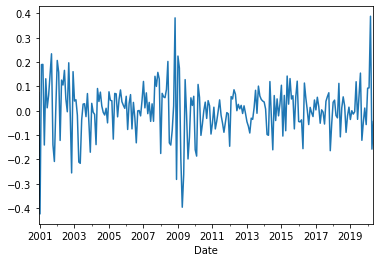

In [267]:
expected_portfolio_returns =lookahead_returns.mul(a).dropna(how='all')
expected_portfolio_returns.T.sum().plot()
expected_portfolio_returns.T.sum().sum()

In [266]:
a=momentum_portfolio(momentum_12_1)

In [244]:
a.sum()

A       1.500000e-01
AAL    -5.000000e-02
AAP     2.000000e-01
AAPL   -6.000000e-01
ABBV   -1.000000e-01
            ...     
SLB     2.500000e-01
SLG     1.387779e-17
SNA     0.000000e+00
SNPS    6.500000e-01
SO      0.000000e+00
Length: 418, dtype: float64

In [189]:
signal=momentum_12_1
cutoff=1 
top_n=20
weight=pd.DataFrame().reindex_like(signal)
dates=signal.index[6]
x=next(signal.loc[dates:,].iterrows())[1].nlargest(top_n)
x
df_short=list(x[(x>cutoff)].index)
df_short
y=next(signal.loc[dates:,].iterrows())[1].nsmallest(top_n)
df_long=list(y[(y<-cutoff)])
df_long
# for dates in signal.index:
#     x=next(signal.loc[dates:,].iterrows())[1].nlargest(top_n)
#     df_short=list(x[(x>cutoff)])
#     y=next(signal.loc[dates:,].iterrows())[1].nsmallest(top_n)
#     df_long=list(y[(y<-cutoff)])
#     weight.loc[dates,df_short]=0
#     weight.loc[dates,df_long]=1

[]

In [190]:
dates

Timestamp('2001-06-01 00:00:00', freq='MS')

In [150]:
df_short

ALXN    4.988399
SBAC    3.528584
JNPR    3.039569
LH      2.721854
ABC     2.552419
NTAP    2.514222
NVDA    2.415771
BIIB    2.327361
REGN    2.299492
CERN    2.111111
Name: 2000-12-01 00:00:00, dtype: float64

In [149]:
cutoff=1
top_n=10
signal=momentum_12_1
weight=pd.DataFrame().reindex_like(signal)
dates=signal.index[0]
x=next(signal.loc[dates:,].iterrows())[1]
df_short=x[(x>cutoff)].nlargest(top_n)
signal.loc[dates]<0

A       False
AAL     False
AAP     False
AAPL     True
ABBV    False
        ...  
SLB     False
SLG     False
SNA      True
SNPS     True
SO      False
Name: 2000-12-01 00:00:00, Length: 418, dtype: bool

<AxesSubplot:xlabel='Date'>

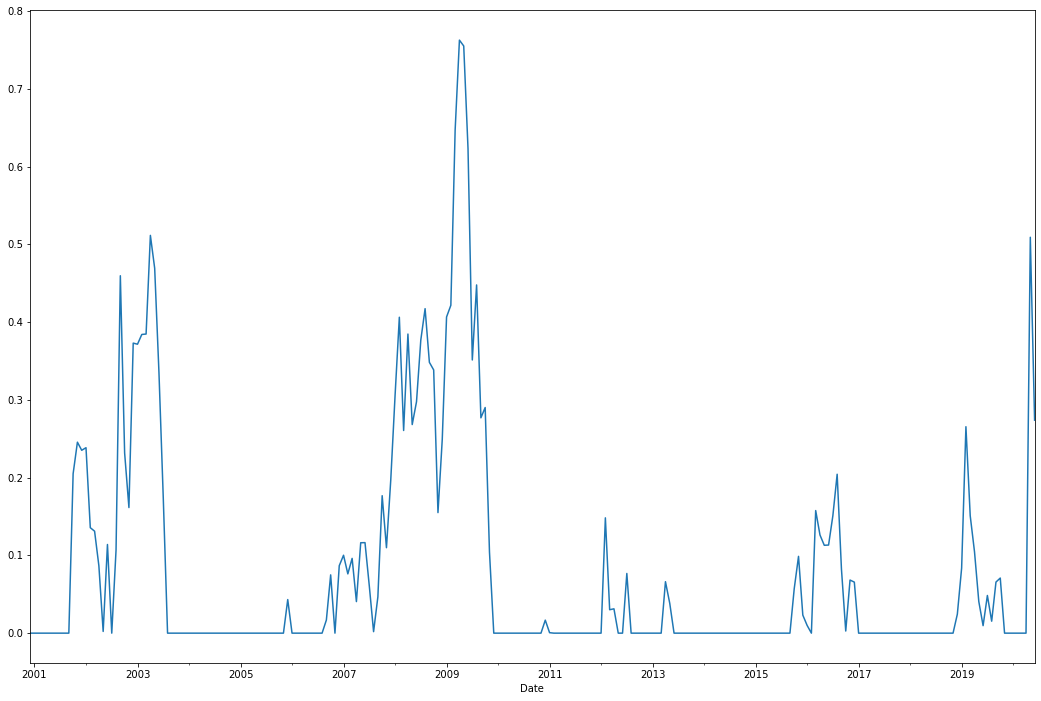

In [97]:
def relu(X):
   return np.maximum(0,X)

def portfolio_weight(signal, equalweight=1):
    weight=pd.DataFrame().reindex_like(signal)
        
    if equalweight:
        for dates in signal.index:
              
    

relu(-momentum_12_1)[stock].dropna().plot(figsize=(18,12))

<AxesSubplot:xlabel='Date'>

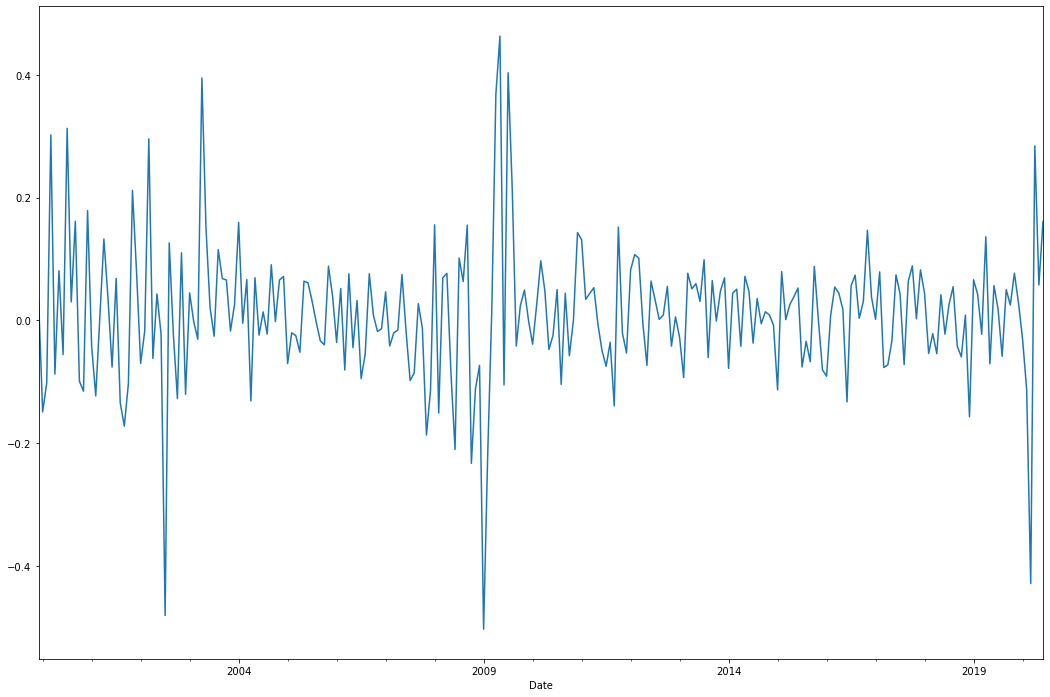

In [99]:
monthly_returns[stock].dropna().plot(figsize=(18,12))

5.    If there is time, redo steps 3 and 4 with the following modifications (not cumulative; try each one independently):
        a.    Recalculate the signal using 3-month momentum
        b.    Rebalance on the 15th of every month (or the first business day after the 15th)
        c.    Rebalance every Monday instead of on the first business day of each month
        d.    Separate the stocks into decile portfolios and recalculate all statistics